In [17]:
# import os
# os.chdir('/home/hugo-dev/esirem-dev/4a/kmutt/kmutt_v2')

In [18]:
import numpy as np
import plotly.express as px
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from utils.load_data import load_data_with_mapping

In [19]:
DATA_PATH = '/Users/hugog/hugo-dev/esirem-dev/4a/kmutt/kmutt_intership_project_v2/'

In [20]:
DATA_PATH += "data/data_25ms_h=0%_16mfcc_RMT-HRK.json"

In [21]:
X, y, mapping = load_data_with_mapping(DATA_PATH)

print(X.shape)
print(y.shape)

Training sets loaded!
(192964, 1, 16)
(192964,)


In [22]:
# plot Total Segments for each class
def plot_segments(y, mapping):
    plt.figure(figsize=(10, 5))
    values, counts = np.unique(y, return_counts=True)
    print(values, counts)
    plt.bar([mapping[val] for val in values], counts)
    plt.xlabel('Classes')
    plt.ylabel('Total Segments')
    plt.title('Total Segments for each class')

[0 1] [ 81234 111730]


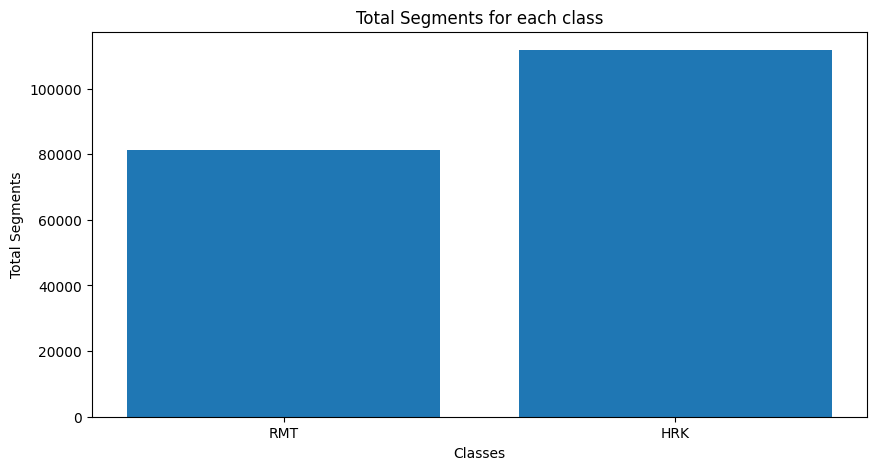

In [23]:
plot_segments(y, mapping)

In [24]:
def calculate_f_ratios(mfcc_data, labels):
    f_ratios = []
    n_mfcc = mfcc_data.shape[2]  # 16 MFCCs

    for i in range(n_mfcc):
        class_data = [mfcc_data[labels == label, 0, i] for label in np.unique(labels)]

        f_val, p_val = f_oneway(*class_data)
        f_ratios.append(f_val)

    return f_ratios

In [25]:
def get_top_3_coefficients(f_ratios):
    return np.argsort(f_ratios)[-3:]

In [26]:
def plot_3d_interactive(mfcc_data, labels, top_3_indices, label_mapping):
    x = mfcc_data[:, 0, top_3_indices[0]]
    y = mfcc_data[:, 0, top_3_indices[1]]
    z = mfcc_data[:, 0, top_3_indices[2]]

    labels = [label_mapping[label] for label in labels]

    df = pd.DataFrame({
        f'MFCC {top_3_indices[0] + 1}': x,
        f'MFCC {top_3_indices[1] + 1}': y,
        f'MFCC {top_3_indices[2] + 1}': z,
        'Class': labels
    })

    fig = px.scatter_3d(df,
                        x=f'MFCC {top_3_indices[0] + 1}',
                        y=f'MFCC {top_3_indices[1] + 1}',
                        z=f'MFCC {top_3_indices[2] + 1}',
                        color='Class',
                        title='3D Scatter Plot of Top 3 MFCC Coefficients')

    fig.write_html("top3-MFCC_plot.html")
    print("DONE")

In [27]:
f_ratios = calculate_f_ratios(X, y)
print(f_ratios)

[83941.10797890468, 22590.29203080679, 10583.976267121136, 89.04705301267296, 7611.559908231943, 973.9647749623958, 1210.4537711846044, 204.69399485904, 2613.137726467462, 13045.948938404867, 127.18753015070547, 7325.484371719266, 3190.0424926235487, 12166.257203323761, 4032.774411600957, 2317.2985289951207]


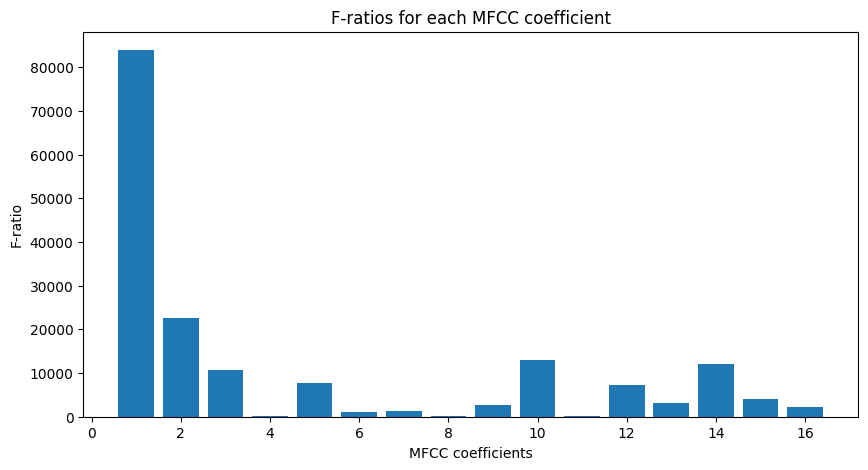

In [28]:
# draw the F-ratios
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(1, 17), f_ratios)
plt.xlabel("MFCC coefficients")
plt.ylabel("F-ratio")
plt.title("F-ratios for each MFCC coefficient")
plt.show()

In [29]:
# rank the F-ratios
sorted_indices = np.argsort(f_ratios)[::-1]
print(sorted_indices)

[ 0  1  9 13  2  4 11 14 12  8 15  6  5  7 10  3]


In [30]:
top_3_indices = get_top_3_coefficients(f_ratios)

# only keep the first 1000 samples for each class to speed up the computation
X = np.concatenate([X[y == label][:1000] for label in np.unique(y)], axis=0)
y = np.concatenate([np.full(1000, label) for label in np.unique(y)], axis=0)

# plot_3d_interactive(X, y, top_3_indices, mapping)